In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
#import gsheet_pandas

In [61]:
my_pal = sns.color_palette("colorblind", 5)
#font = {'family':'avenir', "weight": 'bold', "size": 24}
font = {"size": 20}
plt.rc("font", **font)
del font

In [62]:
from oauth2client.service_account import ServiceAccountCredentials
import gspread
import json

scopes = [
'https://www.googleapis.com/auth/spreadsheets',
'https://www.googleapis.com/auth/drive'
]

credentials = ServiceAccountCredentials.from_json_keyfile_name("rory-water-35cf4199f06b.json", scopes) #access the json key you downloaded earlier 
file = gspread.authorize(credentials) # authenticate the JSON key with gspread
sheet = file.open("Rory water") #open sheet
sheet = sheet.sheet1 #replace sheet_name with the name that corresponds to yours, e.g, it can be sheet1

In [63]:
df=pd.DataFrame(sheet.get_all_records())

In [64]:
df.rename(columns = {"": 'Diff'}, inplace=True)

In [65]:
df['Finish'].replace({"NA": np.nan, "": np.nan}, inplace=True)

/var/folders/z_/0kgsgfpj1sqfh80ww_mrvd8w0000gn/T/ipykernel_79037/2251955243.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Finish'].replace({"NA": np.nan, "": np.nan}, inplace=True)
/var/folders/z_/0kgsgfpj1sqfh80ww_mrvd8w0000gn/T/ipykernel_79037/2251955243.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_down

In [66]:
df['Finish'].isna().sum()
df.dropna(subset='Finish', inplace=True)

In [67]:
df['Diff']=df['Start'] - df['Finish']

In [68]:
df.columns

Index(['Date', 'Start', 'Finish', 'Diff', 'Librela'], dtype='object')

In [69]:
lib_date=pd.to_datetime(df[df['Librela']=='Librela']['Date'])

In [70]:
df = df.groupby('Date').sum().reset_index()

In [71]:
df['Date']=pd.to_datetime(df['Date'])

/var/folders/z_/0kgsgfpj1sqfh80ww_mrvd8w0000gn/T/ipykernel_79037/3023999556.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date']=pd.to_datetime(df['Date'])


In [72]:
#df['Date'] = df['Date'].dt.strftime('%m-%d')

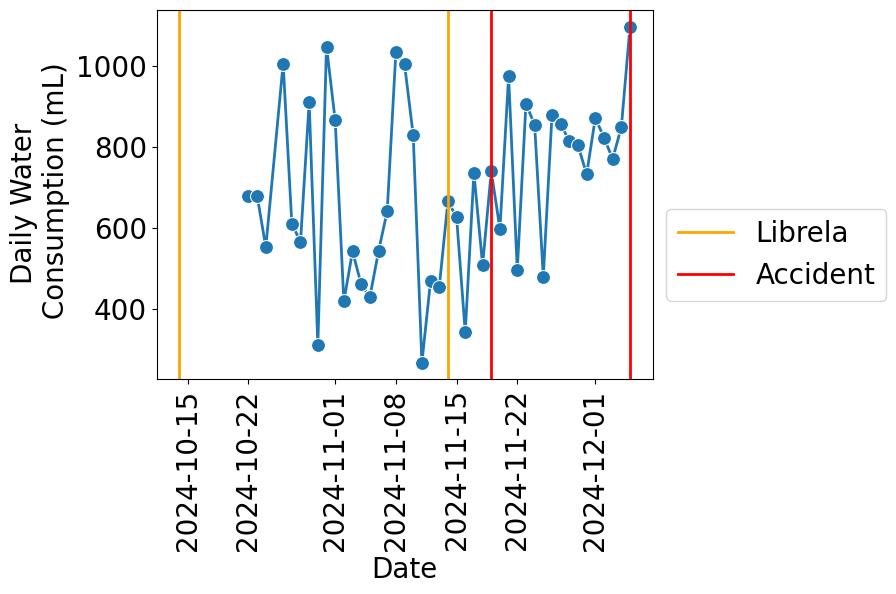

In [75]:
sns.lineplot(data=df, x ='Date', y = 'Diff', marker = 'o', markersize=10, linewidth=2)
plt.axvline(x = lib_date, color = 'orange', label = 'Librela', linewidth=2)
plt.axvline(x = pd.to_datetime("2024-10-14"), color = 'orange', linewidth=2)
plt.axvline(x = pd.to_datetime("2024-11-19"), color = 'red', label = 'Accident', linewidth=2)
plt.axvline(x = pd.to_datetime("2024-12-5"), color = 'red', linewidth=2)
plt.xticks(rotation=90)
plt.ylabel("Daily Water  \n Consumption (mL)")
plt.legend(bbox_to_anchor=(1, 0.5))
#plt.xticks(df['Date'], fontsize=12)
plt.show()